<a href="https://colab.research.google.com/github/Jacques-Mock-Schindler/Studienleistung1/blob/musterloesung/docs/Musterloesung_Histogramm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramme zeichnen mit Pytamaro

Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung
kardinal skalierter Merkmale. Es erfordert die Einteilung der Daten in
Klassen (englisch bins), die eine konstante oder variable Breite haben
können. Es werden direkt nebeneinanderliegende Rechtecke von der Breite
der jeweiligen Klasse gezeichnet, deren Flächeninhalte die (relativen
oder absoluten) Klassenhäufigkeiten darstellen. Die Höhe jedes Rechtecks
stellt dann die (relative oder absolute) Häufigkeitsdichte dar, also die
(relative oder absolute) Häufigkeit dividiert durch die Breite der
entsprechenden Klasse.

[Text von Wikipedia](https://de.wikipedia.org/wiki/Histogramm)

![Histogramm Beispiel](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Thist_german.png/440px-Thist_german.png)

In dieser Übung zeichnen Sie ein Histogramm mit der Verteilung der
Körpergrössen der Schülerinnen und Schüler in Ihrer Klasse.

Hier folgt die Zelle zum Laden von PyTamaro in google colaboratory:

In [1]:
! pip install pytamaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 23.7 MB/s eta 0:00:00


## Listen (Einführung)

Damit die
Körpergrössen in Python sinnvoll verarbeitet werden können, brauchen wir
die Datenstruktur *Liste*.

In Python werden Listen dazu verwendet, mehrere Werte geordnet einer Variablen zuzuweisen.
Listen sind allerdings nur eine von vier in Python standardmässig zur
Verfügung stehenden Datenstrukturen, die das können.

### Listen erstellen

Am einfachsten werden Listen durch Literale erstell. Dazu werden die Werte der Liste durch Kommas getrennt in eckigen Klammern geschrieben:

In [2]:
numbers = [1, 8, 3]
print(numbers)
vegetables = ['Spinat', 'Sellerie', 'Blumenkohl']
print(vegetables)

[1, 8, 3]
['Spinat', 'Sellerie', 'Blumenkohl']


### Auf Elemente einer Liste zugreifen

Die Elemente einer Liste sind geordnet und indexiert. Geordnet heisst,
dass die Liste die Reihenfolge der Elemente so behält, wie sie erstellt
wird - zumindest solange die Liste nicht verändert wird. Indexiert
heisst, dass jedes Element einer Liste eine Nummer erhält. Allerdings
beginnt man mit Null zu zählen. Das bedeutet, dass der `Sellerie` in der Liste `vegetables`den Index `1` hat.

Um das zweite Element der Liste auszugeben, muss Python nach dem Element
mit dem Index `1` der entsprechenden Liste gefragt werden:

In [3]:
print(vegetables[1])

Sellerie


Listen können auch mit einer sogenannten *list comprehenison* erstellt werden.

In [4]:
numbers = [i for i in range(1,21)]
print(numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Eine *list comprehension* funktioniert ähnlich, wie die Beschreibung einer Menge in
der Mathematik ($\{x \in \mathbb{N} \mid 1 \geq x > 21\}$).
```Python
for i in range(1,21)
```
ist bereits bei der Konstruktion der Bahnhofsuhr vorgekommen. `1` ist
der Startwert für den Zähler `i` und 21 die obere Grenze.

Listen sind nützliche Datenstrukturen, weil sie durchlaufen werden
können und dabei jedes einzelne Element als Parameter einer Funktion
übergeben werden kann.

Als Beispiel wird die Quadratzahl jedes Elements in `numbers` berechnet
und ausgegeben.

In [5]:
for number in numbers:
    print(number ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Es hat sich eingebürgert, für Listen Namen von Variablen im Plural zu
wählen. Dann können die einzelnen Elemente im Singular bezeichnet
werden. Dies ist jedoch reine Konvention und technisch nicht
erforderlich. Um das zu zeigen findet sich unten ein Beispiel, das sich
*nicht* an diese Konvention hält. Dazu wird die Liste `numbers` zuerst der Variablen $y$ zugewiesen.

In [6]:
y = numbers
for x in y:
    print(x ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Listen können auch leer sein. Eine leere Liste wird folgendermassen erstellt:

In [7]:
leere_liste = []

Wenn einer bestehenden Liste ein Element angefügt werden soll, stellt
Python die Funktion `listenname.append(Element)` zur Verfügung.

In [8]:
ein_paar_elemente = [2, 5, 1]
print(ein_paar_elemente)
ein_paar_elemente.append(7)
print(ein_paar_elemente)

[2, 5, 1]
[2, 5, 1, 7]


## Anwendung

Als nächstes nehmen Sie die gemessenen Grössen in der Klasse in eine
Liste `measurements` auf. Die entsprechenden Werte finden Sie im File
[Koerpergroessen.CSV](Koerpergroessen.CSV).

In [9]:
measurements = [179, 160, 167, 180, 169, 175, 177, 182, 161, 166, 177, 179, 178,
                172, 170, 164, 155, 171, 173, 161, 185, 158, 169, 172, 170, 175]

### Listen erstellen durch Import der Daten

Kurze Listen, wie hier die Körpergrössen Ihrer Kolleginnen und Kollegen,
können ohne weiteres manuell erstellt werden. Wenn die Listen aber eine
grosse Zahl von Elementen enthalten, ist es sinnvoll, dies Daten zu
importieren und die Liste aus diesem Datenimport zu erstellen. In vielen
Fällen werden die Daten in CSV-Files (Comma Separated Values) zur
Verfügung gestellt. Pyhton verfügt über eine eigene Library um solche
CSV-Files zu lesen und auch zu schreiben. Für *Data Science* Projekte
hat sich aber die
[pandas](https://pandas.pydata.org/)
Data Analysis Library als Quasistandard etabliert.

Diese soll an dieser Stelle entsprechend vorgestellt werden. In der
folgenden Zelle wird die Library importiert.

In [10]:
import pandas as pd

Um eine Tabelle mit mehreren Zeilen und Spalten als ganzes einzulesen, verwendet man einen sogenannten *data frame*. Ein *data frame* ist eine zweidimensionale Struktur mit Spalten und Zeilen. Die Syntax dafür lautet `df = pd.read_csv('name_der_quelle.csv')`, wobei `df` auch durch eine andere Variable ersetzt werden kann.

Der so importierte *data frame* kann durch `print(df.to_string())` ausgegeben (und kontrolliert werden).

In [12]:
df = pd.read_csv('Koerpergroessen.CSV')

print(df.to_string())

   Koerpgergroesse in cm  Geschlecht (f, m, d)   Jahrgang (yyyy) 
0                    1.79             maennlich              2009
1                     160                     f              2009
2                     167                     f              2009
3                     180                     m              2008
4                     169                     m              2008
5                     175                     m              2008
6                   177cm                     m              2008
7                     182                     m              2009
8                     161                     f              2008
9                  1.66 m                     f              2009
10                    177                     m              2008
11                    179                     m              2008
12                    178                     m              2007
13                    172                     f              2008
14        

Um ein Histogramm der Körpergrössen zu erstellen, braucht es nur die Spalte "Koerpergroesse in cm". Im folgenden soll aus dieser Spalte eine Liste erstellt werden. Dazu braucht es die folgende Befehlssequenz:

`chosen_column = df['header'].to_list()`

Dabei kann `chosen_column` durch einen sinnvollen Namen eigener Wahl ersetzt werden. Anstelle von `'header'` wird der Titel der gewünschten Spalte eingesetzt.

In [13]:
measurements_from_df = df['Koerpgergroesse in cm '].to_list()
print(measurements_from_df)

['1.79', '160', '167', '180', '169', '175', '177cm', '182', '161', '1.66 m', '177', '179', '178', '172', '170', '164cm', '155', '171', '173 cm', '161', '185', '158', '169', '172', '170', '175']


Mit `print(measurements_from_df)` kann die so erzeugte Liste angezeigt werden. Dabei fällt auf (wie schon im Angezeigten Dataframe), dass die Daten einerseits als String vorliegen und anderseits nicht einheitlich erfasst worden sind. Auch hier gilt, bei relativ wenigen Daten, kann die Bereinigung manuell erfolgen. Wenn es sich aber um einen grossen Datensatz handelt, muss die Bereinigung automatisiert werden.

Eine einfache Vorgehensweise sucht dabei alle Fehlertypen und iteriert dann über die Liste um jeden Fehlertypen zu eliminieren. Im vorliegenden Beispiel sind die Fehler ".", " m" und "cm". Diese drei Fehlertypen können mithilfe der Methode `.replace("str", "str")` und einer *list comprehension* gefunden und korrigiert werden. Anstelle des ersten Strings wird der gesuchte Fehlertyp eingefüllt und als Korrektur wird ein leerer String angegeben. Für den Fehler "." lautet die Syntax dann `measurements_cleaned = measure.replace(".", "") for measure in measurements_from_df]`. Wenn das für alle Fehlertypen gemacht worden ist, werden die Strings in einer weiteren *list comprehension* in Integer umgegwandelt.

In [14]:
measurements_cleaned = [measure.replace(".", "") for measure in measurements_from_df]
measurements_cleaned = [measure.replace("cm", "") for measure in measurements_cleaned]
measurements_cleaned = [measure.replace(" m", "") for measure in measurements_cleaned]
print(measurements_cleaned)
measurements_as_int = [int(measure) for measure in measurements_cleaned]
print(measurements_as_int)

['179', '160', '167', '180', '169', '175', '177', '182', '161', '166', '177', '179', '178', '172', '170', '164', '155', '171', '173 ', '161', '185', '158', '169', '172', '170', '175']
[179, 160, 167, 180, 169, 175, 177, 182, 161, 166, 177, 179, 178, 172, 170, 164, 155, 171, 173, 161, 185, 158, 169, 172, 170, 175]


### Einteilung der Daten in Klassen

Damit aus der Liste der Körpergrössen ein Histogramm gezeichnet werden
kann, müssen die Körpergrössen in Klassen (engl. bin) eingeteilt werden
und die Elemente einer Klasse gezählt werden.

Für diese Übung sollen die Körpergrössen in Klassen mit 5cm Abstand eingeteilt werden. Das
heisst, eine Klasse sind zum Beispiel alle Werte von 160cm bis 164cm.

Als Vorbereitung sehen Sie in der folgenden Zelle eine Schleife, die einmal über alle
Grössen läuft und zählt, wie viele Werte zwischen 160cm bis 164cm liegen.

In [15]:
bin_160_bis_164 = 0
for measure in measurements:
    if measure >= 160 and measure < 165:
        bin_160_bis_164 += 1

print(bin_160_bis_164)

4


#### `if`-Statement

Dieses Code Snippet führt eine Bedingung ein.
Bedingungen oder
sogenannte `if`-Statements stellen sicher, dass bestimmter Code nur
ausgeführt wird, wenn die Bedingung, die geprüft wird, eingehalten wird. Im
Beispiel werden zwei Bedingungen geprüft, die kumulativ erfüllt sein
müssen (erste Bedinung `measure >= 160`, zweite Bedingung
`measure < 165`). Das heisst, wenn beide Bedingungen erfüllt sind, wird
`bin_160_bis_164 += 1` ausgeführt. Dies ist eine Kurzschreibweise für
`bin_160_bis_164 = bin_160_bis_164 + 1`. Es wird also jedesmal, wenn die Bedingung erfüllt ist, `bin_160_bis_164` um 1 hochgezählt.

Damit dies für alle 5-cm-Klassen in der Liste verallgemeinert werden kann, muss der kleinste und der grösste Wert der Liste bekannt sein.

Das Minimum einer Liste kann folgendermassen ermittelt werden:

In [16]:
def get_minimum(input : list[int]) -> int:
    minimum = input[0]

    for value in input:
        if value < minimum:
            minimum = value

    return minimum

print(get_minimum(measurements))

155


Schreiben Sie eine vergleichbare Funktion, die das Maximum einer Liste ausgibt.

In [17]:
def get_maximum(input : list[int]) -> int:
    maximum = input[0]

    for value in input:
        if value > maximum:
            maximum = value

    return maximum
print(get_maximum(measurements))

185


#### Vertiefung `if`-Statements

Um die Möglichkeiten, welche `if`-Statements bieten noch etwas weiter zu
illustrieren, finden Sie in der nächsten Zelle eine Schleife, welche
gerade Zahlen quadriert und ungerade mit drei potenziert. Falls statt
einer Zahl ein anderer Datentyp auftaucht, wird der String `unzulässiger
Input` in die Liste der Resultate eingetragen.

In [18]:
demo_list = [1, 2, 3, 4, 5, 'hallo', 7, 8, 9]

def if_demo(numbers : list[int]) -> list[int]:
    results = []
    for number in numbers:
        if type(number) != int:
            results.append('unzulässiger Input')
        elif number % 2 == 0:
            results.append(number ** 2)
        else:
            results.append(number ** 3)
    return results

print(if_demo(demo_list))

[1, 4, 27, 16, 125, 'unzulässiger Input', 343, 64, 729]


In diesem Beispiel bedeutet `!=` **nicht**. Es wird
geprüft, ob number vom Typ `int` ist, wenn dies nicht der Fall ist, wird
in der Resultatliste `unzulässiger Input` eingetragen. Mit `elif` wird
eine zweite Bedingung geprüft. Im Beispiel ob die Zahl ohne Rest durch 2
teilbar ist (`number % 2 == 0`). Damit Python zwischen einem Vergleich
und einer Zuweisung unterscheiden kann, wird bei Vergleichen ein
doppeltes Gleichheitszeichen verwendet. Falls keine der beiden geprüften
Bedingungen erfüllt ist, wird mit `else` angezeigt, was mit dem Rest der
Fälle zu geschehen habe.

Aus den obigen Beispielen geht implizit hervor, dass sowohl `elif` wie
auch `else` optional sind. `elif` Bedingungen können beliebig viele
eingefügt werden, `else` kann nur einmal vorkommen.

#### Systemeigene Python Funktion `min()` und `max()`

Dass das Minimum oder das Maximum aus einer Liste mit Werten gesucht wird, ist relativ häufig.
Python stellt daher eine systemeigene Funktion `min()` und `max()` zur Verfügung, welche das Miniumum bzw. das Maximum einer Liste ausgeben. Trotzdem war das eine gute Fingerübung, um sich mit der
Funktion von Bedingungen vertraut zu machen.

#### Zählen der Werte für die einzelnen Klassen

Nun sollten Sie in der Lage sein, den Beispiel Code für die Grössen
zwischen 160cm und 164cm zu verallgemeinern, so dass die
ganze Liste der Körpergrössen in 5cm Bins "abgefüllt" wird.

Hinweis: Die einzelnen Bins sind ihrerseits Elemente einer Liste.

In [19]:
def measure_to_bin(measurements : list[int]) -> list[float]:
    bins = []
    total = len(measurements)
    lower_end = min(measurements) // 5 * 5
    upper_end = max(measurements) // 5 * 5 + 5
    counter = 0

    for i in range(lower_end, upper_end, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1
        bins.append(counter)
        counter = 0

    return bins

zahlen = measure_to_bin(measurements)

print(measure_to_bin(measurements))

[2, 4, 4, 6, 7, 2, 1]


## Visualisierung

Die so gruppierten Werte können nun visualisiert werden. Dazu braucht es
eine Funktion, welche eine Liste als Parameter entgegennimmt und eine
Liste mit Grafiken (Rechtecken mit der entsprechenden Länge) zurückgibt.

Die dafür nötigen PyTamaro Funktionen werden in der folgenden Zelle importiert.

In [20]:
from pytamaro.de import (rechteck, text, Grafik,
                         blau, schwarz, transparent,
                         fixiere, kombiniere, drehe, ueber,
                         unten_links, unten_rechts, oben_rechts,
                         mitte_rechts, mitte_links, oben_mitte, unten_mitte,
                         zeige_grafik)

Mit hilfe von PyTamaro kann nun eine Funktion geschrieben werden, die
Säulen mit fixer Breite und variabler Höhe in einer Liste ausgeben.

In [21]:
def create_pillars(heights : list[float]) -> list[Grafik]:
    width = 10
    pillars = []

    for height in heights:
        pillars.append(rechteck(width, height, blau))

    return pillars

saeulen = create_pillars(zahlen)

Abschliessend müssen die Säulen noch nebeneinander angeordnet werden.
Dazu werden die Funktionen `fixiere()` und `kombiniere()` verwendet.

In [22]:
def draw_histogram(pillars : list[Grafik]) -> Grafik:
    histogram = fixiere(unten_rechts, pillars[0])

    for i in range(1, len(pillars)):
        histogram = kombiniere(histogram, fixiere(unten_links, pillars[i]))
        histogram = fixiere(unten_rechts, histogram)

    return(histogram)

resultat = draw_histogram(saeulen)
zeige_grafik(resultat)

### Skalierung

Das Histogramm mit den absoluten, unbearbeiteten Zahlen ist etwas Flach. Entsprechend muss die Darstellung skaliert werden. Eine Lösung könnte die Überhöhung der Werte sein.

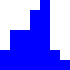

In [23]:
zahlen_ueberhoeht = [zahl * 10 for zahl in zahlen]
ueberhoehte_saeulen = create_pillars(zahlen_ueberhoeht)
histogram_ueberhoeht = draw_histogram(ueberhoehte_saeulen)

zeige_grafik(histogram_ueberhoeht)

Eine andere Variante ist die Arbeit mit relativen Werten. Die Zahlen in den einzelnen Klassen werden in Prozenten ausgedrückt und dann werden diese dargestellt. Dies würde den Zusätzlichen Vorteil bieten, dass verschiedene Samples besser mitenander verglichen werden können.

In [27]:
zahlen_relativ = [zahl / sum(zahlen) * 100 for zahl in zahlen]
relative_saeulen = create_pillars(zahlen_relativ)
histogram_relativ = draw_histogram(relative_saeulen)

zeige_grafik(histogram_relativ)

### Achsen
Das ganze ist immer noch etwas klein. Ausserdem fehlen die Achsen. In einem nächsten Schritt können diese beiden Mängel beseitigt werden.

In [47]:
def draw_arrowhead():
    pfeil_seite = rechteck(5, 1, schwarz)
    pfeil_seite_unten = fixiere(oben_rechts, drehe(45, pfeil_seite))
    pfeil_seite_oben = fixiere(unten_rechts, drehe(-45, pfeil_seite))
    pfeilspitze = fixiere(mitte_rechts,
                          kombiniere(pfeil_seite_oben, pfeil_seite_unten))
    return pfeilspitze

In [30]:
def draw_x_axis(values : float, label : str) -> Grafik:
    x = fixiere(mitte_rechts, rechteck(len(values)*5 + 5, 1, schwarz))
    pfeil_seite = rechteck(2.5, 1, schwarz)
    pfeil_seite_unten = fixiere(oben_rechts, drehe(45, pfeil_seite))
    pfeil_seite_oben = fixiere(unten_rechts, drehe(-45, pfeil_seite))
    pfeilspitze = fixiere(mitte_rechts,
                          kombiniere(pfeil_seite_oben, pfeil_seite_unten))
    pfeil_x = fixiere(unten_mitte, kombiniere(x, pfeilspitze))

    x_label = fixiere(oben_mitte, text(label, "Arial", 11, schwarz))

    x_achse = kombiniere(pfeil_x, x_label)

    return x_achse

zeige_grafik(draw_x_axis(zahlen, "x-Achse"))


In [48]:
def draw_y_axis(values : float) -> Grafik:
    endpunkt = int((max(values) + 10) // 10)
    y_label = []

    for i in range(endpunkt + 1):
        y_label.append(i * 10)

    y = fixiere(oben_mitte, rechteck(1, y_label[-1] + 5, schwarz))
    spitze = fixiere(oben_mitte, drehe(90, draw_arrowhead()))
    pfeil = kombiniere(y, spitze)

    return pfeil

y_achse = draw_y_axis(zahlen_relativ)
zeige_grafik(y_achse)

In [ ]:
def draw_axis(values : float) -> Grafik:
    x = fixiere(mitte_rechts, rechteck(len(values)*5 + 5, 1, schwarz))
    pfeil_seite = rechteck(2.5, 1, schwarz)
    pfeil_seite_unten = fixiere(oben_rechts, drehe(45, pfeil_seite))
    pfeil_seite_oben = fixiere(unten_rechts, drehe(-45, pfeil_seite))
    pfeilspitze = fixiere(mitte_rechts,
                          kombiniere(pfeil_seite_oben, pfeil_seite_unten))
    pfeil_x = fixiere(mitte_links, kombiniere(x, pfeilspitze))

    y = fixiere(oben_mitte, rechteck(1, max(values) + 5, schwarz))
    pfeilspitze_y = fixiere(oben_mitte, drehe(90, pfeilspitze))
    pfeil_y = fixiere(unten_mitte, kombiniere(y, pfeilspitze_y))

    tick = rechteck(3, 1, schwarz)
    abstand = rechteck(3, 5, transparent)
    ticks = abstand
    for i in range(int(max(values)/5)-1):
        ticks = ueber(tick, ticks)
        ticks = ueber(abstand, ticks)

    ticks = fixiere(unten_mitte, ticks)

    achsen = fixiere(unten_links, kombiniere(pfeil_x, pfeil_y))
    achsen = kombiniere(achsen, ticks)

    return achsen


achsen = fixiere(unten_links, draw_axis(zahlen_relativ))

histogram_relativ = fixiere(unten_links, histogram_relativ)

grafik = kombiniere(achsen, histogram_relativ)

zeige_grafik(grafik)



Damit das Erstellen eines Histogramms für den Nutzer etwas komfortabler
möglich ist, sollen nun die einzelnen Funktionen so kombiniert werden,
dass einer Funktion eine Liste mit Werten übergeben werden kann und
diese dann ein Histogramm zurückgibt.

In [ ]:
def get_histogram(values : list[float]) -> Grafik:
    # TODO: schreiben Sie eine kombinierte Funktion
    pass